### Latent Features

#### Latent features are features that aren't explicitly in your dataset.

##### The following features are all related to the latent feature _home size_:

- lot size
- number of rooms
- floor plan size
- size of garage
- number of bedrooms
- number of bathrooms

###### Similarly, the following features could be reduced to a single latent feature of _home neighborhood_:

- local crime rate
- number of schools in five miles
- property tax rate
- local median income
- average air quality index
- distance to highway

##### So even if our original dataset has the 12 features listed, we might be able to reduce this to only 2 latent features relating to the home size and home neighborhood.

### Your Turn

In the previous video, you saw an example of working with some MNIST digits data.  The MNIST dataset can be found here: http://yann.lecun.com/exdb/mnist/.

First, let's import the necessary libraries.  Notice there are also some imports from a file called `helper_functions`, which contains the functions used in the previous video.

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, show_images_by_digit, fit_random_forest_classifier2 
from helper_functions import fit_random_forest_classifier, do_pca, plot_components
import test_code as t

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

`1.` Use pandas to read in the dataset, which can be found in this workspace using the filepath **'./data/train.csv'**.  If you have missing values, fill them with 0.  Take a look at info about the data using `head`, `tail`, `describe`, `info`, etc.  You can learn more about the data values from the article here: https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm.

In [6]:
data = pd.read_csv('data/train.csv')
data.fillna(0, inplace=True)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,...,6304.000000,6304.000000,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0
mean,4.440355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139594,0.142291,0.026967,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.885613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.099940,5.531089,1.675547,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` Create a vector called y that holds the **label** column of the dataset.  Store all other columns holding the pixel data of your images in X.

In [13]:
y = data['label']
X = data.drop(['label'], axis=1)

In [14]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [15]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Check Your Solution 
t.question_two_check(y, X)

That looks right!


`3.` Now use the `show_images_by_digit` function from the `helper_functions` module to take a look some of the `1`'s, `2`'s, `3`'s, or any other value you are interested in looking at.  Do they all look like what you would expect?

/home/workspace/helper_functions.py:63: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  mat_data = X.iloc[indices[0][digit_num]].as_matrix().reshape(28,28)  #reshape images


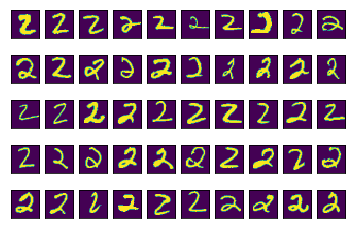

In [17]:
show_images_by_digit(2) # Try looking at a few other digits

/home/workspace/helper_functions.py:63: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  mat_data = X.iloc[indices[0][digit_num]].as_matrix().reshape(28,28)  #reshape images


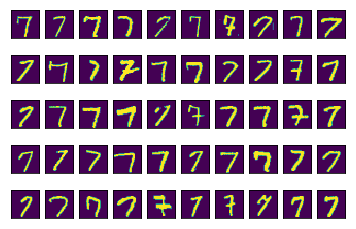

In [18]:
show_images_by_digit(7)

`4.` Now that you have had a chance to look through some of the data, you can try some different algorithms to see what works well to use the X matrix to predict the response well.  If you would like to use the function I used in the video regarding random forests, you can run the code below, but you might also try any of the supervised techniques you learned in the previous course to see what works best.

If you decide to put together your own classifier, remember the 4 steps to this process:

**I.** Instantiate your model. (with all the hyperparameter values you care about)

**II.** Fit your model. (to the training data)

**III.** Predict using your fitted model.  (on the test data)

**IV.** Score your model. (comparing the predictions to the actual values on the test data)

You can also try a grid search to see if you can improve on your initial predictions.

In [19]:
# Remove the tag to fit the RF model from the video, you can also try fitting your own!
fit_random_forest_classifier(X, y)

[[201   0   1   0   0   0   6   0   1   0]
 [  0 234   2   0   0   1   1   2   3   0]
 [  1   5 214   1   1   1   1   3   0   1]
 [  3   0   6 169   0   8   0   1   2   2]
 [  0   0   0   0 171   1   3   0   0   3]
 [  2   1   0   4   0 174   3   0   2   0]
 [  3   0   1   0   1   3 202   0   1   0]
 [  0   0   6   1   5   0   0 206   2   5]
 [  0   1   1   7   0   4   2   0 185   2]
 [  2   1   1   3  10   1   0   1   3 186]]
0.933205189813


0.93320518981259015

In [34]:
ada_classifier = AdaBoostClassifier(n_estimators=200, learning_rate=0.5)

ada_fit = ada_classifier.fit(X, y)
ada_preds = ada_fit.predict(X)

print(confusion_matrix(y, ada_preds))
acc = accuracy_score(y, ada_preds)
print(acc)

[[522   0  15   9   1  42  32   0   4   1]
 [  0 647   6   4   0   8   0   1  18   0]
 [  5  33 423   6  16   3 126  16  62   3]
 [  8   7  14 414   0  39  20   2  93  13]
 [  0   0  16   5 448   3   6  32   8  84]
 [  9  11   1  45   6 399  14   0  72  10]
 [  4   7  54   2  28  31 508   2   6   1]
 [  0   1  15   2  21   2   0 556   6  56]
 [  3  38   6  20   3  20   8   5 480  19]
 [  3   2  10   9  63   4   0  69  10 448]]
0.76855964467


`5.` Now for the purpose of this lesson, to look at PCA.  In the video, I created a model just using two features.  Replicate the process below. You can use the same `do_pca` function that was created in the previous video.  Store your variables in **pca** and **X_pca**.

In [36]:
pca, X_pca = do_pca(2, X)

`6.` The **X_pca** has reduced the original number of more than 700 features down to only 2 features that capture the majority of the variability in the pixel values.  Use the space below to fit a model using these two features to predict the written value.  You can use the random forest model by running `fit_random_forest_classifier` the same way as in the video. How well does it perform?

In [37]:
fit_random_forest_classifier(X_pca, y)

[[110   0  38   9   7  10  26   0   8   1]
 [  0 209   0   3   2   9   5   5   6   4]
 [ 36   3  76  23  13  21  37   2  14   3]
 [ 11   2  31  20  22  28  25  12  26  14]
 [  5   4  18  17  48  15  17  13  13  28]
 [  9   8  30  23  15  26  28   3  33  11]
 [ 30   4  51  24   8  25  38   3  26   2]
 [  3   5   4  11  29   8   1  94   9  61]
 [  6   6  24  29  21  34  27  10  35  10]
 [  2  13   5  16  28  11   4  60   8  61]]
0.344545891398


0.34454589139836617

`7.` Now you can look at the separation of the values using the `plot_components` function.  If you plot all of the points (more than 40,000), you will likely not be able to see much of what is happening.  I recommend plotting just a subset of the data.  Which value(s) have some separation that are being predicted better than others based on these two components?

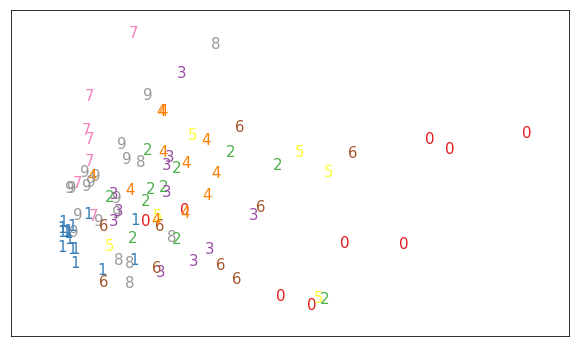

In [38]:
# Try plotting some of the numbers below - you can change the number
# of digits that are plotted, but it is probably best not to plot the 
# entire dataset.  Your visual will not be readable.

plot_components(X_pca[:100], y[:100])

`8.` See if you can find a reduced number of features that provides better separation to make predictions.  Say you want to get separation that allows for accuracy of more than 90%, how many principal components are needed to obtain this level of accuracy?  Were you able to substantially reduce the number of features needed in your final model?

In [51]:
#pca, X_pca = do_pca(10, X)
#pca, X_pca = do_pca(20, X)
pca, X_pca = do_pca(30, X)

In [52]:
fit_random_forest_classifier(X_pca, y)

[[193   0   4   0   1   0   8   1   1   1]
 [  0 233   2   1   0   0   2   0   4   1]
 [  3   2 207   4   2   0   3   4   3   0]
 [  0   0  13 167   0   3   0   2   6   0]
 [  0   0   3   0 161   0   3   1   0  10]
 [  2   0   1   9   0 168   1   0   2   3]
 [  3   0   2   0   4   1 200   0   1   0]
 [  0   0   6   1   3   0   1 200   2  12]
 [  3   1   0  12   0   7   0   1 176   2]
 [  1   0   2   4  14   0   0  14   1 172]]
0.901970206631


0.90197020663142724

`9.` It is possible that extra features in the dataset even lead to overfitting or the [curse of dimensionality](https://stats.stackexchange.com/questions/65379/machine-learning-curse-of-dimensionality-explained).  Do you have evidence of this happening for this dataset?  Can you support your evidence with a visual or table?  To avoid printing out all of the metric results, I created another function called `fit_random_forest_classifier2`.  I ran through a significant number of components to create the visual for the solution, but I strongly recommend you look in the range below 100 principal components!

In [46]:
fit_random_forest_classifier2(X, y)

0.93560788082652568

In [ ]:
# I would highly recommend not running the below code, as it had to run overnight to complete.
# Instead, you can run a smaller number of components that still allows you to see enough.


accs = []
comps = []
for comp in range(20, 100):
    comps.append(comp)
    pca, X_pca = do_pca(comp, X)
    acc = fit_random_forest_classifier2(X_pca, y)
    accs.append(acc)

In [53]:
plt.plot(comps, accs, 'bo');
plt.xlabel('Number of Components');
plt.ylabel('Accuracy');
plt.title('Number of Components by Accuracy');

NameError: name 'comps' is not defined

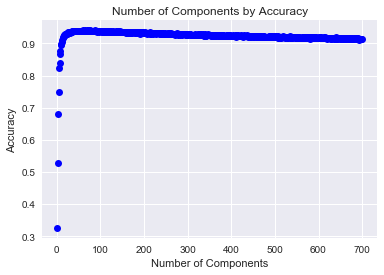

In [ ]:
np.max(accs), comps[np.where(accs == np.max(accs))[0][0]]

(0.94126984126984126, 61)

### Your Turn!

In the last video, you saw two of the main aspects of principal components:

1. **The amount of variability captured by the component.**
2. **The components themselves.**

In this notebook, you will get a chance to explore these a bit more yourself.  First, let's read in the necessary libraries, as well as the data.

/home/workspace/helper_functions.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  mat_data = X.iloc[digit_num].as_matrix().reshape(28,28)  #reshape images


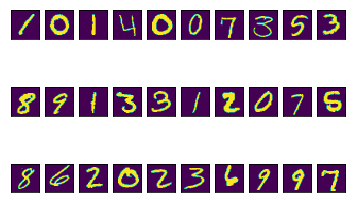

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, do_pca, scree_plot, plot_component
import test_code as t

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read in our dataset
train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)

# save the labels to a Pandas series target
y = train['label']
# Drop the label feature
X = train.drop("label",axis=1)

show_images(30)

`1.` Perform PCA on the **X** matrix using on your own or using the **do_pca** function from the **helper_functions** module. Reduce the original more than 700 features to only 10 principal components.

In [2]:
# Make sure to keep track of the resulting components and the pca object
scale = StandardScaler().fit_transform(X)
pca = PCA(10)
X_pca = pca.fit_transform(scale)

`2.` Now use the **scree_plot** function from the **helper_functions** module to take a closer look at the results of your analysis.

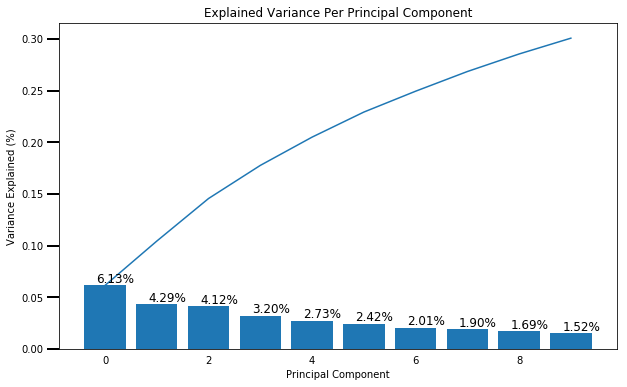

In [3]:
scree_plot(pca)

`3.` Using the results of your scree plot, match each letter as the value to the correct key in the **solution_three** dictionary.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [4]:
a = True
b = False
c = 6.13
d = 'The total amount of variability in the data explained by the first two principal components'
e = None

solution_three = {
    '10.42' : d, 
    'The first component will ALWAYS have the most amount of variability explained.': a,
    'The total amount of variability in the data explained by the first component': c,
    'The sum of the variability explained by all the components can be greater than 100%': b
}

In [5]:
#Run this cell to see if your solution matches ours
t.question_3_check(solution_three)

Looks good!  The amount of variability explained by each principal component gives us an idea of how much of the original variability in the original data is retained by each component.  Nice job matching these up!


`4.` Use the **plot_component** function from the **helper_functions** module to look at each of the components (remember they are 0 indexed).  Use the results to assist with question 5.

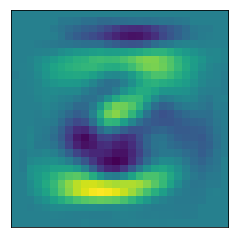

In [14]:
# Use the images of the component weights to answer the next question
plot_component(pca, 3)

`5.` Using the results from viewing each of your principal component weights in question 4, change the following values of the **solution_five** dictionary to the **number of the index** for the principal component that best matches the description.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [15]:
solution_five = {
    'This component looks like it will assist in identifying zero': 0,
    'This component looks like it will assist in identifying three': 3
}

In [16]:
#Run this cell to see if your solution matches ours
t.question_5_check(solution_five)

Nice job!  That matches our solution as well!  The index of the first principal component appears to have really high weights where a zero would appear.  Alternatively, the fourth (third indexed component) appears to downweight where a three would appear to make it stand out.


From this notebook, you have had an opportunity to look at the two major parts of PCA:

`I.` The amount of **variance explained by each component**.  This is called an **eigenvalue**.

`II.` The principal components themselves, each component is a vector of weights.  In this case, the principal components help us understand which pixels of the image are most helpful in identifying the difference between digits. **Principal components** are also known as **eigenvectors**.

### PCA Mini Project

In the lesson, you saw how you could use PCA to substantially reduce the dimensionality of the handwritten digits.  In this mini-project, you will be using the **cars.csv** file.  

To begin, run the cell below to read in the necessary libraries and the dataset.  I also read in the helper functions that you used throughout the lesson in case you might find them helpful in completing this project.  Otherwise, you can always create functions of your own!

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import do_pca, scree_plot, plot_components, pca_results
from IPython import display
import test_code2 as t

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('./data/cars.csv')

`1.` Now your data is stored in **df**.  Use the below cells to take a look your dataset.  At the end of your exploration, use your findings to match the appropriate variable to each key in the dictionary below.  

In [2]:
#Use this cell for work
df.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [3]:
# and this one
df.describe()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
count,387.000000,387.000000,387.000000,387.000000,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.116279,0.152455,0.072351,0.054264,0.0,0.201550,0.242894,33231.180879,30440.653747,3.127390,5.757106,214.444444,20.312661,27.263566,3532.457364,107.211886,184.961240,71.276486
std,0.320974,0.359926,0.259404,0.226830,0.0,0.401677,0.429387,19724.634576,17901.179282,1.014314,1.490182,70.262822,5.262333,5.636005,706.003622,7.086553,13.237999,3.368329
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,20997.000000,19575.000000,2.300000,4.000000,165.000000,18.000000,24.000000,3107.000000,103.000000,177.000000,69.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,28495.000000,26155.000000,3.000000,6.000000,210.000000,19.000000,27.000000,3469.000000,107.000000,186.000000,71.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,39552.500000,36124.000000,3.800000,6.000000,250.000000,21.500000,30.000000,3922.000000,112.000000,193.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,192465.000000,173560.000000,6.000000,12.000000,493.000000,60.000000,66.000000,6400.000000,130.000000,221.000000,81.000000


In [4]:
# and this one if you need it - and create more cells if you need them
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, Acura 3.5 RL to Volvo XC90 T6
Data columns (total 18 columns):
Sports        387 non-null int64
SUV           387 non-null int64
Wagon         387 non-null int64
Minivan       387 non-null int64
Pickup        387 non-null int64
AWD           387 non-null int64
RWD           387 non-null int64
Retail        387 non-null int64
Dealer        387 non-null int64
Engine        387 non-null float64
Cylinders     387 non-null int64
Horsepower    387 non-null int64
CityMPG       387 non-null int64
HighwayMPG    387 non-null int64
Weight        387 non-null int64
Wheelbase     387 non-null int64
Length        387 non-null int64
Width         387 non-null int64
dtypes: float64(1), int64(17)
memory usage: 57.4+ KB


In [5]:
a = 7
b = 66
c = 387
d = 18
e = 0.23
f = 0.05

solution_1_dict = {
    'The number of cars in the dataset': c,
    'The number of car features in the dataset': d,
    'The number of dummy variables in the dataset': a,
    'The proportion of minivans in the dataset': f,
    'The max highway mpg for any car': b
}

In [6]:
# Check your solution against ours by running this cell
display.HTML(t.check_question_one(solution_1_dict))

Nice job!  Looks like your dataset matches what we found!


`2.` There are some particularly nice properties about PCA to keep in mind.  Use the dictionary below to match the correct variable as the key to each statement.  When you are ready, check your solution against ours by running the following cell.

In [7]:
a = True
b = False

solution_2_dict = {
    'The components span the directions of maximum variability.': a,
    'The components are always orthogonal to one another.': a,
    'Eigenvalues tell us the amount of information a component holds': a
}

In [8]:
# Check your solution against ours by running this cell
t.check_question_two(solution_2_dict)

That's right these are all true.  Principal components are orthogonal, span the directions of maximum variability, and the corresponding eigenvalues tell us how much of the original variability is explained by each component.


`3.` Fit PCA to reduce the current dimensionality of the datset to 3 dimensions.  You can use the helper functions, or perform the steps on your own.  If you fit on your own, be sure to standardize your data.  At the end of this process, you will want an X matrix with the reduced dimensionality to only 3 features.  Additionally, you will want your **pca** object back that has been used to fit and transform your dataset. 

In [9]:
#Scale your data, fit, and transform using pca
#you need a pca object and your transformed data matrix
scale = StandardScaler().fit_transform(df)
pca = PCA(3)
X_pca = pca.fit_transform(scale)

`4.` Once you have your pca object, you can take a closer look at what comprises each of the principal components.  Use the **pca_results** function from the **helper_functions** module assist with taking a closer look at the results of your analysis.  The function takes two arguments: the full dataset and the pca object you created.

,Explained Variance,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Dimension 1,0.4352,-0.0343,-0.1298,0.0289,-0.0481,-0.0,-0.0928,-0.1175,-0.2592,-0.2576,-0.3396,-0.3263,-0.3118,0.3063,0.3061,-0.3317,-0.2546,-0.2414,-0.2886
Dimension 2,0.1667,0.4420,-0.2261,-0.0106,-0.2074,-0.0,-0.1447,0.3751,0.3447,0.3453,0.0022,0.0799,0.2342,0.0169,0.0433,-0.1832,-0.3066,-0.2701,-0.2163
Dimension 3,0.1034,0.0875,0.4898,0.0496,-0.2818,0.0,0.5506,-0.2416,0.0154,0.0132,-0.0489,-0.0648,0.0040,-0.1421,-0.2486,0.0851,-0.2846,-0.3361,-0.1369


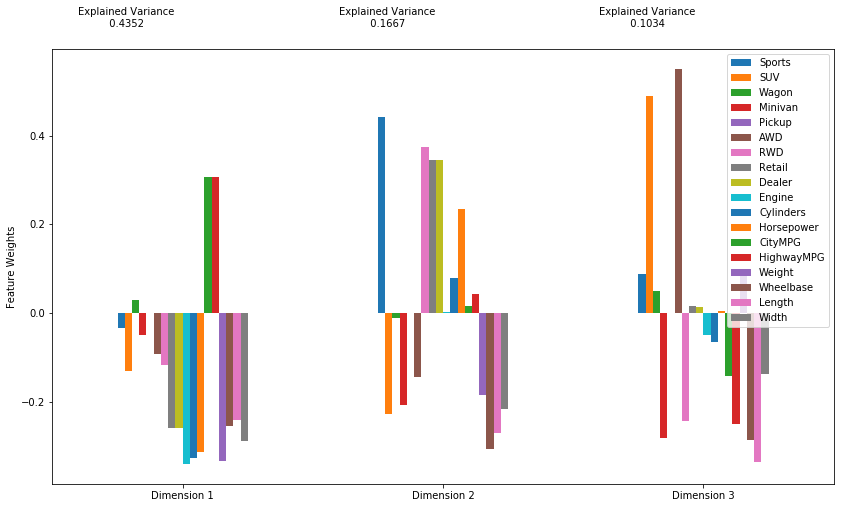

In [11]:
pca_results(df, pca)

`5.` Use the results, to match each of the variables as the value to the most appropriate key in the dictionary below.  When you are ready to check your answers, run the following cell to see if your solution matches ours!

In [12]:
a = 'car weight'
b = 'sports cars'
c = 'gas mileage'
d = 0.4352
e = 0.3061
f = 0.1667
g = 0.7053

solution_5_dict = {
    'The first component positively weights items related to': c, 
    'The amount of variability explained by the first component is': d,
    'The largest weight of the second component is related to': b,
    'The total amount of variability explained by the first three components': g
}

In [13]:
# Run this cell to check if your solution matches ours.
t.check_question_five(solution_5_dict)

That's right!  Looks like you know a lot about PCA!


`6.` How many components need to be kept to explain at least 85% of the variability in the original dataset?  When you think you have the answer, store it in the variable `num_comps`.  Then run the following cell to see if your solution matches ours!

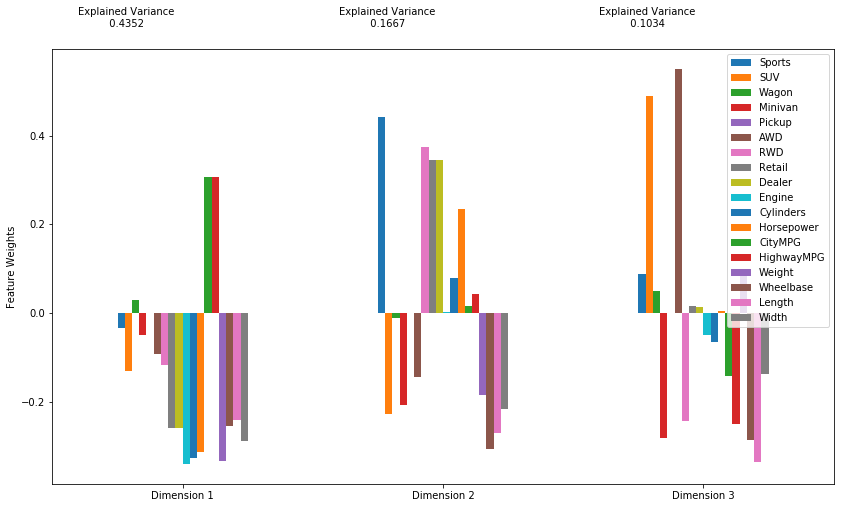

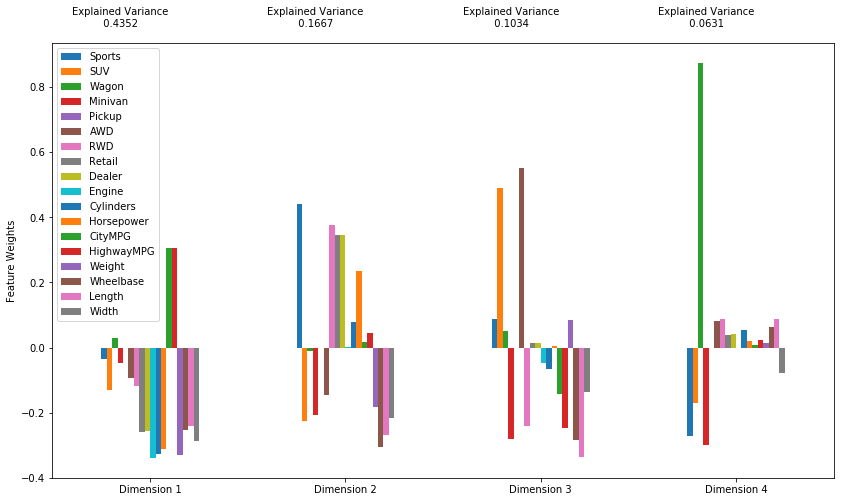

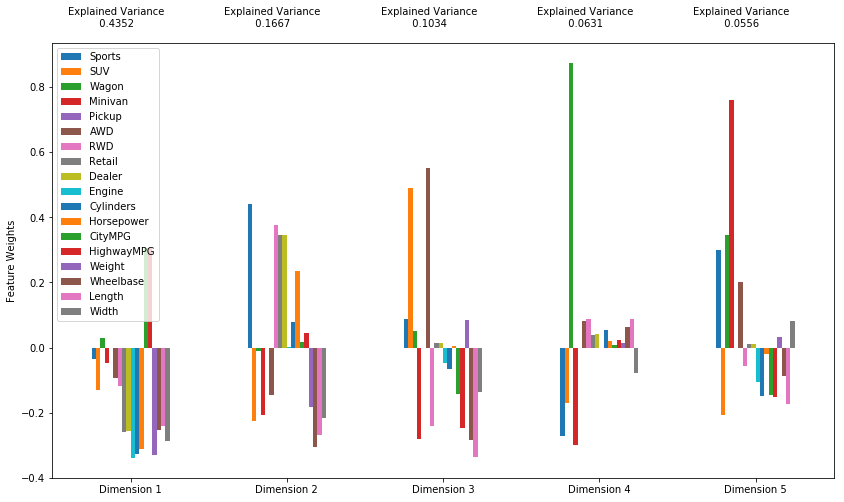

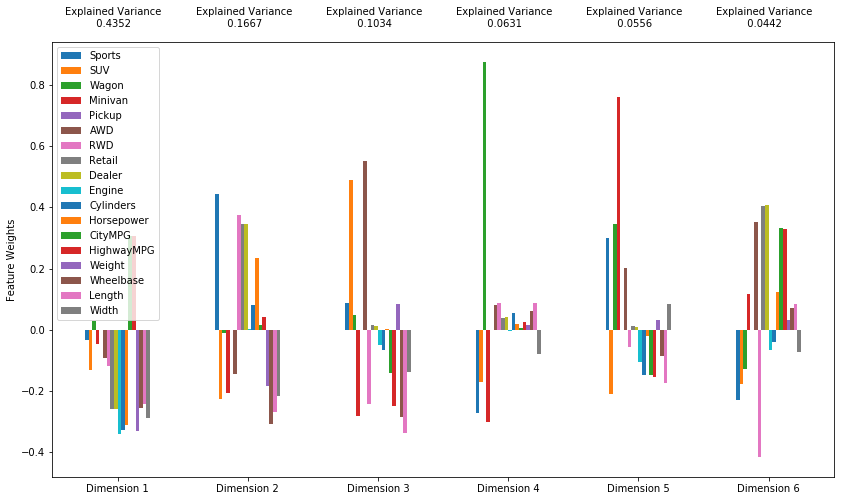

In [15]:
#Code to find number of components providing more than 
# 85% of variance explained
accs = []
scale = StandardScaler().fit_transform(df)
for comp in range(3, df.shape[1]):
    pca = PCA(comp)
    X_pca = pca.fit_transform(scale)
    acc = pca_results(df, pca)
    if acc['Explained Variance'].sum() >= .85:
        break

num_comps = comp

In [16]:
# Now check your answer here to complete this mini project!
display.HTML(t.question_check_six(num_comps))

Nice job!  That's right!  With 6 components, you can explain more than 85% of the variability in the original dataset.
